mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                   Model  Accuracy   ROC-AUC
0  Decision Tree (Stump)  0.894737  0.897150
1               AdaBoost  0.973684  0.969702


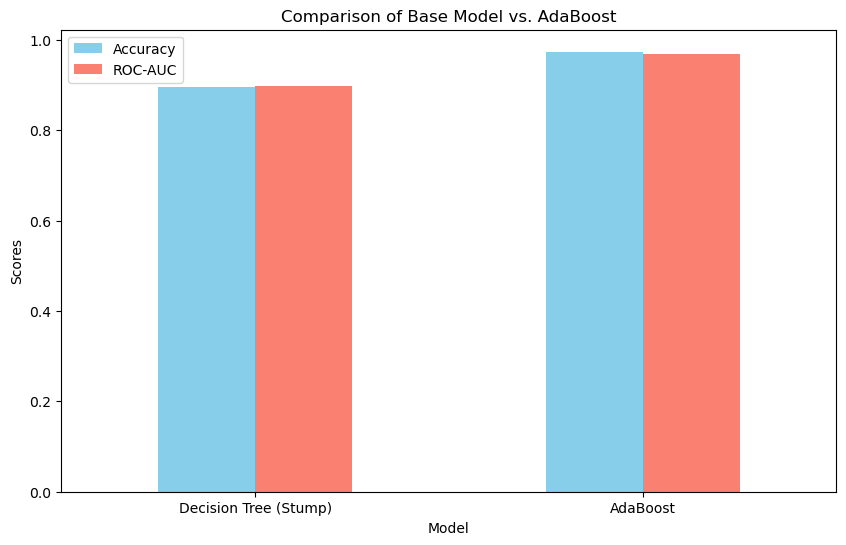

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.isnull().sum())
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

base_pred = base_model.predict(X_test)
base_accuracy = accuracy_score(y_test, base_pred)
base_roc_auc = roc_auc_score(y_test, base_pred)

adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_pred)

performance = pd.DataFrame({
    'Model': ['Decision Tree (Stump)', 'AdaBoost'],
    'Accuracy': [base_accuracy, adaboost_accuracy],
    'ROC-AUC': [base_roc_auc, adaboost_roc_auc]
})

print(performance)

performance.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Comparison of Base Model vs. AdaBoost')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()
